## 선형 모델(Linear Models)
* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}
  + $x$: 입력 데이터
  
  예를 들어, 여러 학생들의 공부 시간과 시험 점수를 사용해보겠습니다.
각 학생의 공부 시간은 입력 데이터 x가 됩니다.
  + $w$: 모델이 학습할 파라미터
  
  이 파라미터들은 모델이 학습하는 값들입니다. 즉, 데이터를 통해 찾고자 하는 값들입니다.
  + $w_0$: 편향
  
  모델의 시작점 같은 것입니다. 즉, 직선이 어디서 시작하는지를 결정합니다.
예를 들어, 공부를 하나도 안 해도 받을 수 있는 기본 점수와 같습니다.
  + $w_1$~$w_p$: 가중치
  
  각 입력 데이터에 곱해지는 값들입니다. 즉, 각 공부 시간에 얼마나 비중을 두는지를 결정합니다.
예를 들어, 공부 시간이 늘어날 때 시험 점수가 얼마나 오르는지를 나타냅니다.

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)


In [ ]:
# 패키지를 불러옵니다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize

In [ ]:
# 데이터를 불러옵니다
## Colab에 주어져 있는 샘플 데이터를 사용합니다
train = pd.read_csv('./sample_data/california_housing_train.csv', sep=',', encoding='utf-8')
test = pd.read_csv('./sample_data/california_housing_test.csv', sep=',', encoding='utf-8')

display(test.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [ ]:
# x와 y로 데이터를 구분합니다
x_train = train.drop('median_house_value', axis=1).values
y_train = train['median_house_value'].values

x_test = test.drop('median_house_value', axis=1).values
y_test = test['median_house_value'].values
x_train

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [ ]:
# 다중 선형회귀 모델을 생성합니다
model = LinearRegression()

In [ ]:
# 모델을 학습합니다
model.fit(X=x_train, y=y_train)

LinearRegression()

In [ ]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# 테스트 데이터로 예측합니다
pred = model.predict(x_test)
test['prediction_house_value'] = pred # 테스트 데이터의 DataFrame에 예측값 컬럼을 추가합니다

display(test.head()) # 테스트 데이터의 DataFrame의 첫 5줄을 읽습니다

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,352812.311125
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,212717.700745
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,272344.699519
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,314244.319350
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,119644.222387


In [ ]:
# 성능을 확인합니다
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ', rmse)

RMSE:  69765.36022216761


In [ ]:
plt.rcParams['figure.figsize'] = [50, 16] # 도표의 크기를 가로길이 50, 세로길이 16으로 해주세요
plt.rcParams['font.size'] = 32 # 폰트 크기를 32로 해주세요

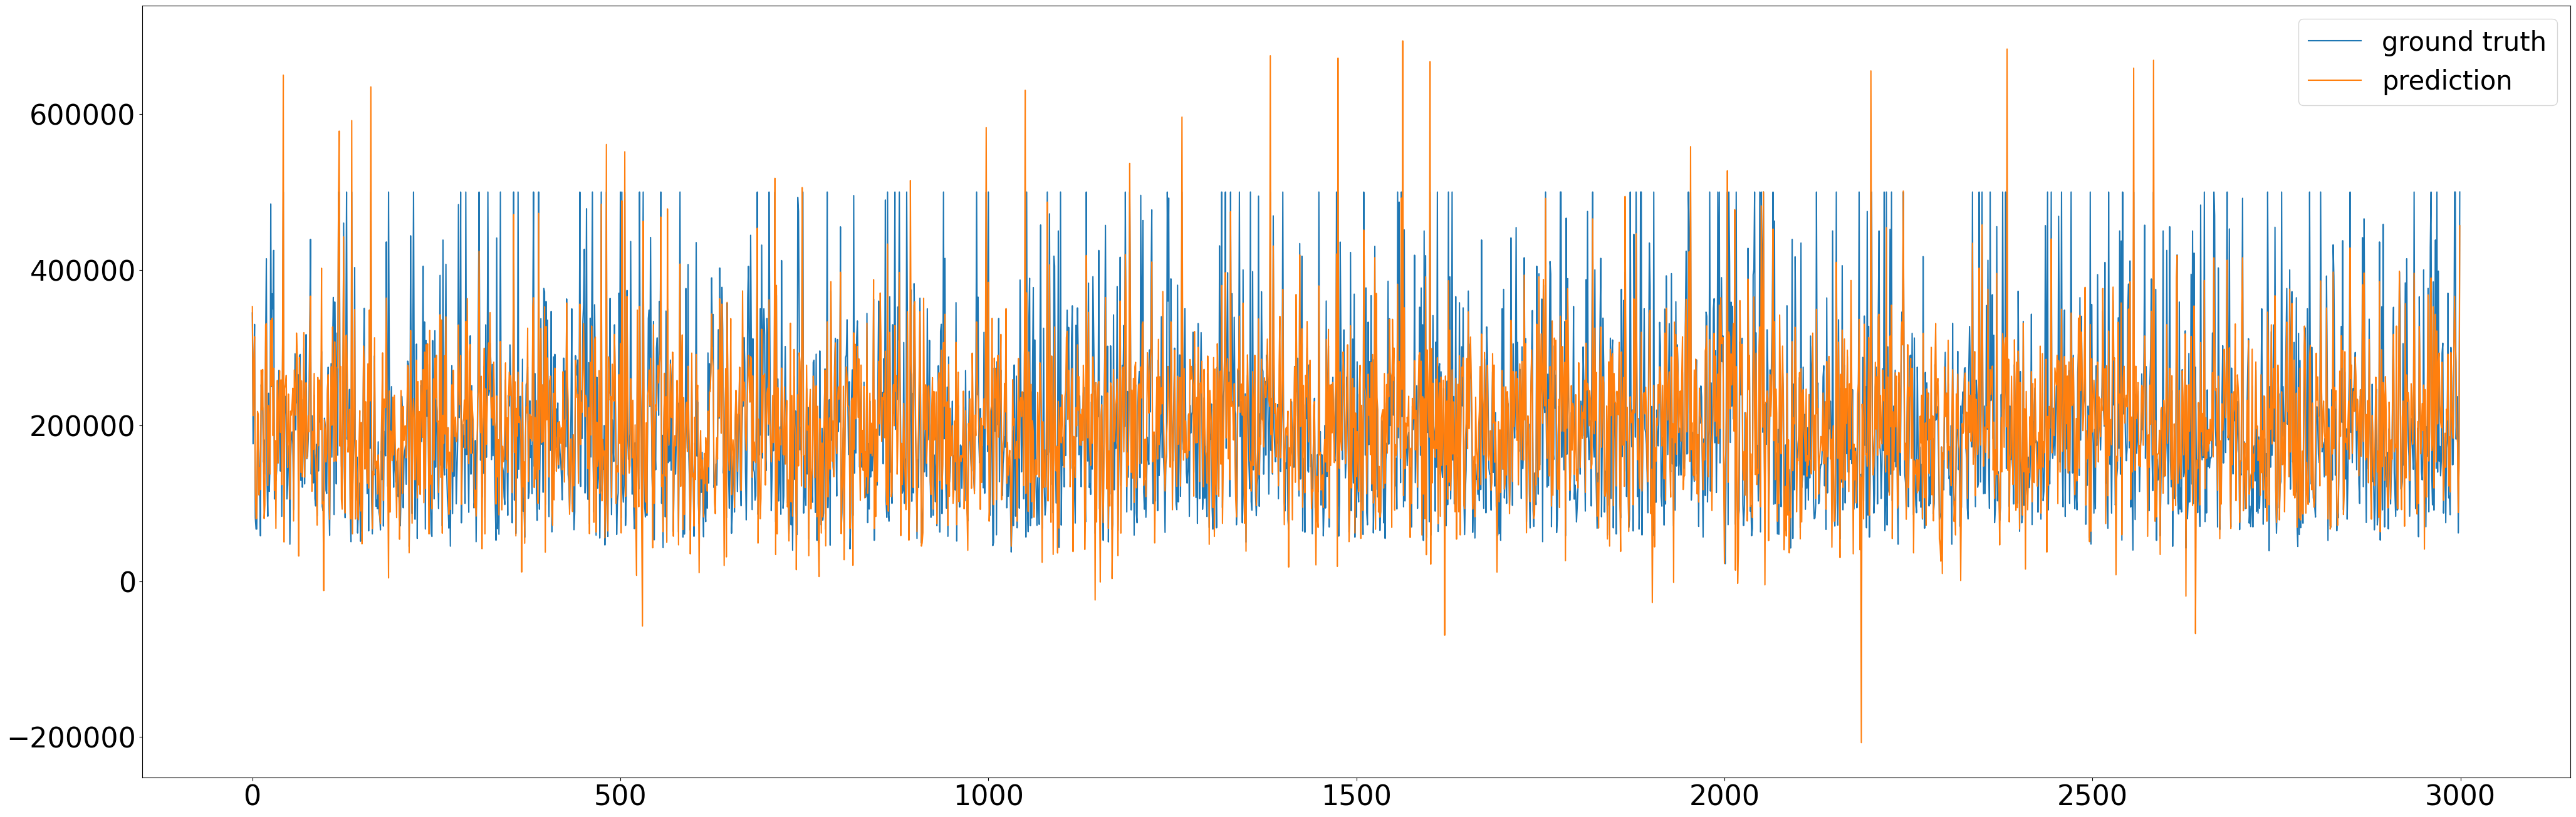

In [ ]:
# 그래프를 그립니다
plt.plot(y_test, label='ground truth') # y값에 대한 그래프를 그리고 이름을 정합니다
plt.plot(pred, label='prediction')     # 예측값에 대한 그래프를 그리고 이름을 정합니다
plt.legend(fontsize=30)                # 범례를 표시합니다
plt.show()

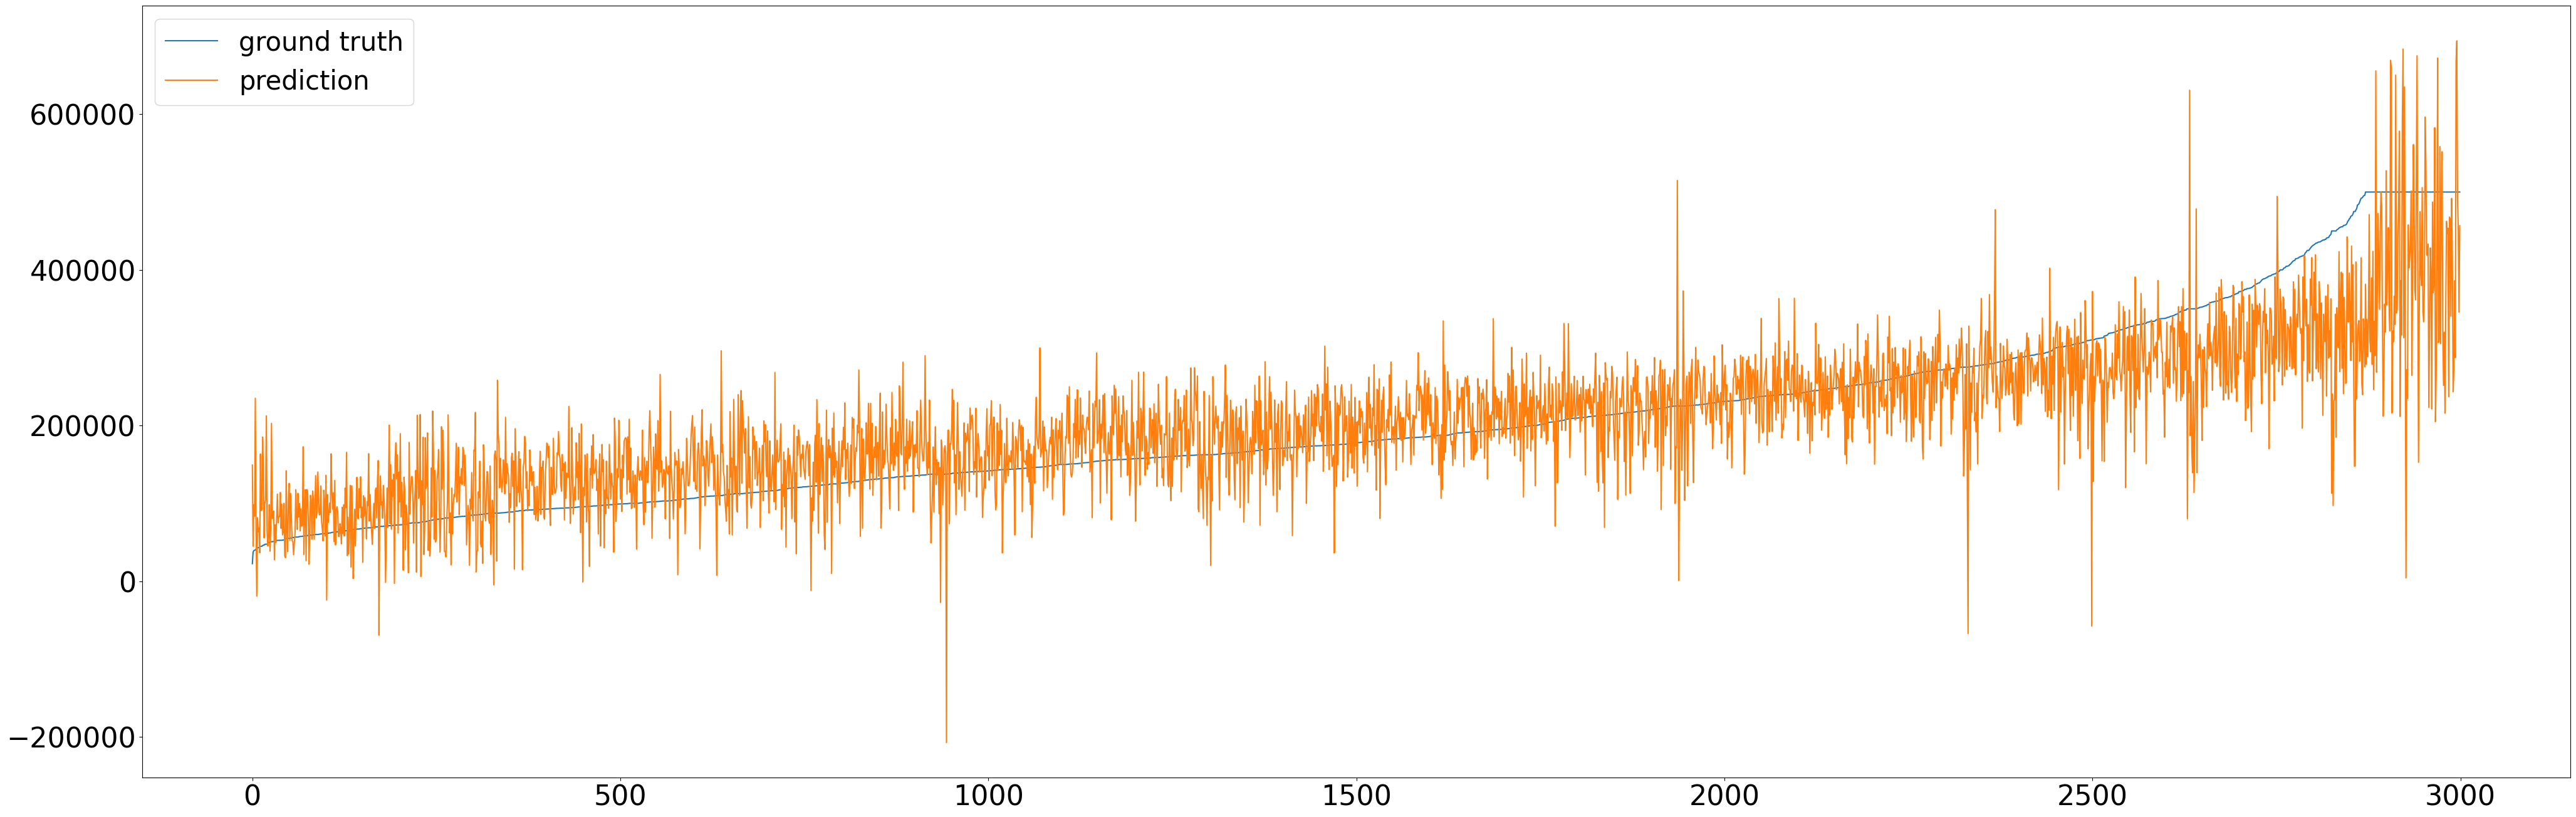

In [ ]:
# 그래프를 그립니다
idx = np.argsort(y_test) # y값의 오름차순으로 인덱스를 나열합니다
plt.plot(y_test[idx], label='ground truth')
plt.plot(pred[idx], label='prediction')
plt.legend(fontsize=30)
plt.show()

## 운송시간 예측 예제

- 선형회귀모형을 사용한 간단한 운송시간 예측 문제


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 특성 데이터 (거리, 무게, 부피 등)
X_train = np.array([[100, 10], [200, 15], [300, 20], [400, 25]])
# 타겟 변수 (운송시간)
y_train = np.array([2, 3, 4, 5])

In [ ]:
# 선형 회귀 모델
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 새로운 데이터에 대한 예측
new_data = np.array([[250, 12]])
predicted_time = model.predict(new_data)

print("예측된 운송시간:", predicted_time)

예측된 운송시간: [3.49725686]


## K-Nearest Neighbor(K-NN) K-최근접 이웃

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
- 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단하는 알고리즘
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)


In [140]:
# 패키지를 불러옵니다
import numpy as np                                 # 배열(array)을 쉽게 사용하기 위한 패키지입니다
import pandas as pd                                # 데이터를 쉽게 보고 사용하기 위한 패키지입니다
import matplotlib.pyplot as plt                    # 시각화(visualization) 클래스입니다

from sklearn.neighbors import KNeighborsClassifier # 사용할 머신러닝 알고리즘입니다
from sklearn.decomposition import PCA              # 주성분 분석 알고리즘입니다
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Confusion matrix를 그립니다

In [ ]:
# 데이터를 불러옵니다
train = pd.read_csv('./example_train.csv', sep=',', encoding='utf-8') # 학습 데이터를 DataFrame의 형태로 읽습니다
test = pd.read_csv('./example_test.csv', sep=',', encoding='utf-8')   # 테스트 데이터를 DataFrame의 형태로 읽습니다

display(train.head()) # 학습 데이터 DataFrame의 첫 5줄을 읽습니다

,city,latitude,longitude,size,weight,category,target
0,2,52.7,19.8,197,3725,0,1
1,1,46.1,13.2,211,4500,1,2
2,1,40.6,18.6,183,3550,0,0
3,2,45.5,17.0,196,3500,1,1
4,2,51.3,19.9,198,3700,0,1


In [142]:
# x와 y로 데이터를 구분합니다
x_train = train.drop(['target'], axis=1).values
y_train = train['target'].values

x_test = test.drop(['target'], axis=1).values
y_test = test['target'].values

In [143]:
# K-Nearest Neighbor 분류기를 생성합니다
model = KNeighborsClassifier(
    n_neighbors=30,     # 한 군집을 이루는 최근접이웃 개수
    weights='distance', # ['uniform', 'distance']: 군집의 성향을 결정하기 위한 데이터 포인트별 가중치
    n_jobs=-1           # 병렬처리
)

In [144]:
# 모델을 학습합니다
model.fit(X=x_train, y=y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30, weights='distance')

In [145]:
# 테스트 데이터로 예측합니다
pred = model.predict(x_test)
test['prediction'] = pred # 테스트 데이터의 DataFrame에 예측값 컬럼을 추가합니다
test['prediction_warehouse'] = test['prediction'].replace(
    {0: 'Warehouse1', 1: 'Warehouse2', 2: 'Warehouse3'}
)

display(test.head()) # 테스트 데이터의 DataFrame의 첫 5줄을 읽습니다

,city,latitude,longitude,size,weight,category,target,prediction,prediction_warehouse
0,1,50.0,15.2,218,5700,0,2,2,Warehouse3
1,2,48.5,17.5,191,3400,0,1,1,Warehouse2
2,2,54.2,20.8,201,4300,0,1,0,Warehouse1
3,1,39.6,17.7,186,3500,1,0,0,Warehouse1
4,1,40.6,18.8,193,3800,0,0,0,Warehouse1


In [146]:
# 성능을 확인합니다
print(f'Correct: {sum(pred == y_test)}, Incorrect: {sum(pred != y_test)}, Total: {len(test.index)}')
print('Accuracy: ', model.score(x_test, y_test) * 100)

Correct: 81, Incorrect: 19, Total: 100
Accuracy:  81.0


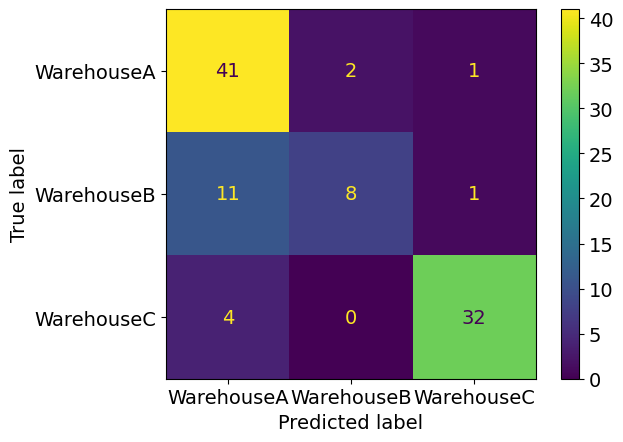

In [147]:
# 쉘 매직: 도표를 출력창 안에 띄워주세요
%matplotlib inline

plt.rcParams['font.size'] = 14 # 폰트 크기를 32로 해주세요

# Confusion matrix를 그립니다
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['WarehouseA', 'WarehouseB', 'WarehouseC']
)
disp.plot()
plt.show()

In [148]:
# 주성분 분석을 실시합니다
pca = PCA(n_components=2)        # 주성분을 2개로 합니다
x_pc = pca.fit_transform(x_test)

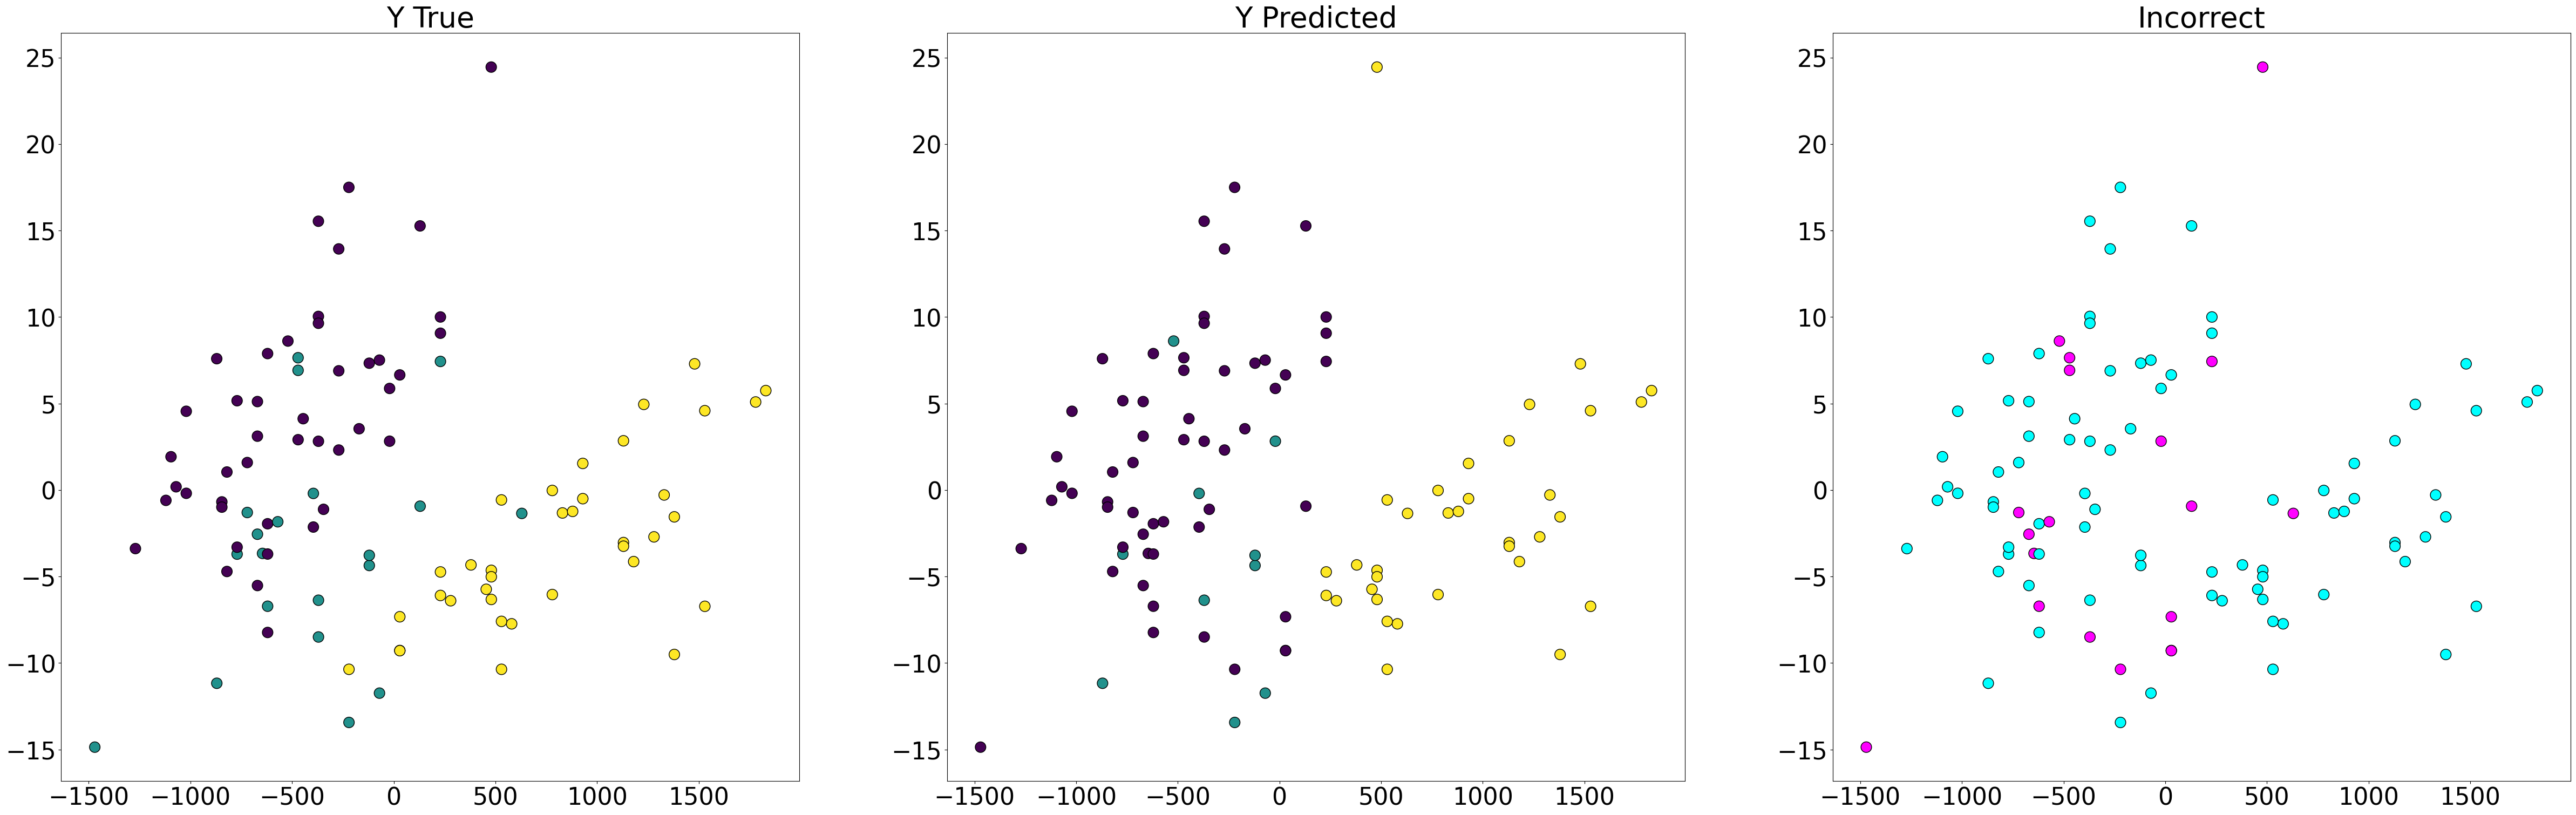

In [149]:
plt.rcParams['font.size'] = 32 # 폰트 크기를 32로 해주세요

# 산점도를 그립니다
plt.figure(figsize=(60, 18))
plt.subplot(1, 3, 1) #subplot(raw, column, index)
plt.scatter(x_pc[:, 0], x_pc[:, 1], c=y_test, edgecolors='k', s=200)
plt.title('Y True')
plt.subplot(1, 3, 2)
plt.scatter(x_pc[:, 0], x_pc[:, 1], c=pred, edgecolors='k', s=200)
plt.title('Y Predicted')
plt.subplot(1, 3, 3)
plt.scatter(x_pc[:, 0], x_pc[:, 1], c=(pred != y_test), cmap='cool', edgecolors='k', s=200)
plt.title('Incorrect')
plt.show()

In [150]:
def score(n_neighbors, x_train, y_train, x_test, y_test):
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights='distance',
        n_jobs=-1
    )
    model.fit(X=x_train, y=y_train)
    score = model.score(x_test, y_test) * 100
    return score

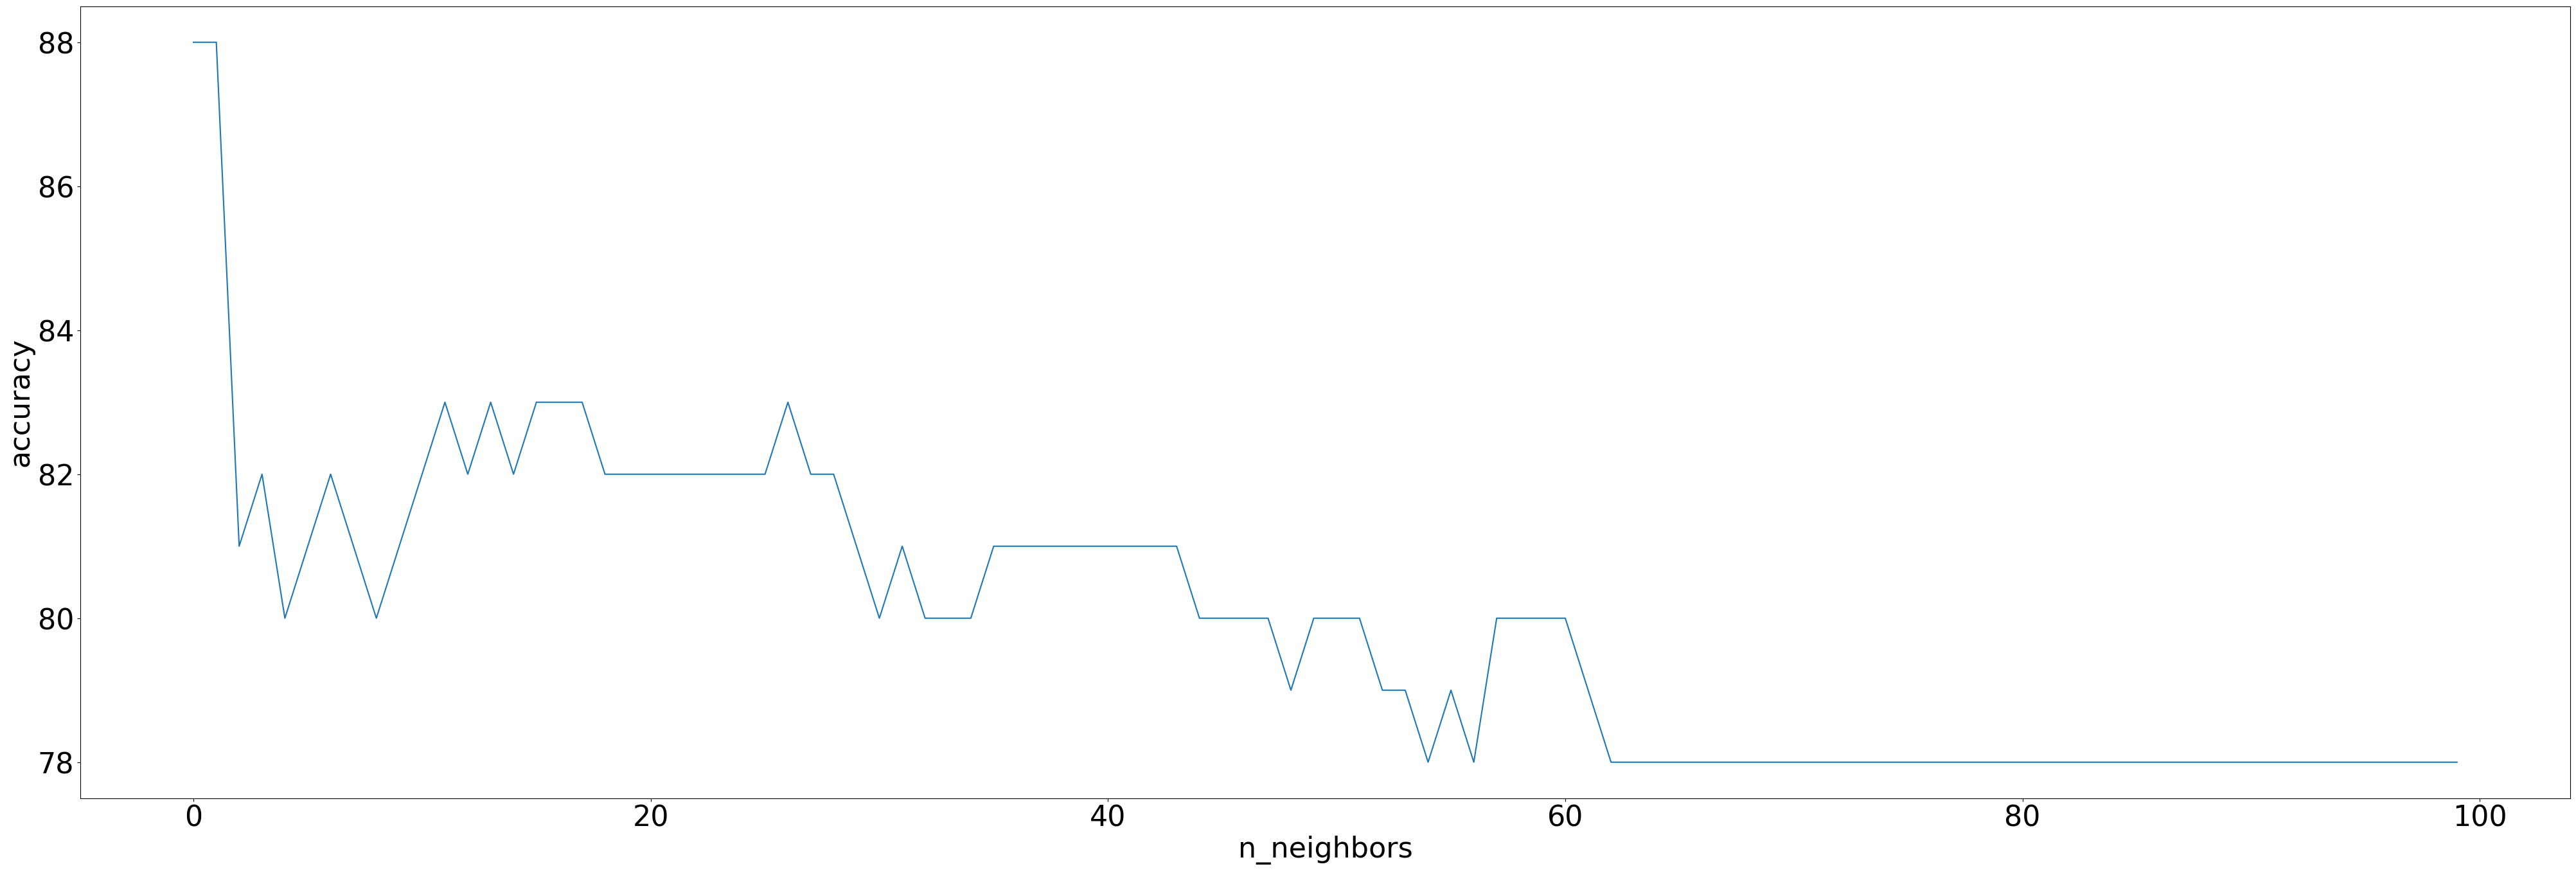

In [151]:
# 최근접이웃 개수에 따른 성능변화
n_neighbors = np.arange(1, 101) # 1~100까지 나열합니다
scores = [score(n, x_train, y_train, x_test, y_test) for n in n_neighbors] #

plt.figure(figsize=(50, 16))
plt.plot(scores)
plt.xlabel('n_neighbors', fontsize=32)
plt.ylabel('accuracy', fontsize=32)
plt.show()

## Desision Tree 의사결정트리

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다

지니(Gini) 지수는 의사결정나무(Decision Tree) 알고리즘에서 노드를 분할할 때 사용하는 기준 중 하나입니다. 지니 지수는 불순도를 측정하는 지표로, 특정 데이터셋이 얼마나 혼합되어 있는지를 나타냅니다.

지니 지수(Gini Index) 계산 :
$$
Gini = 1 - \sum (p_i^2)
$$
- 지니 지수는 클래스 분포가 균등할수록 높아지고, 한쪽으로 치우칠수록 낮아집니다.
- 특정 노드의 지니 지수는 1에서 해당 노드의 각 클래스에 속하는 데이터 비율의 제곱을 뺀 값으로 계산됩니다.

지니 지수의 의미
- 지니 지수가 0이면 노드가 완전히 순수하다는 것을 의미합니다. 즉, 모든 데이터가 같은 클래스에 속한다는 뜻입니다.
- 지니 지수가 0에 가까울수록, 노드에 있는 데이터가 동일한 클래스에 속하는 비율이 높습니다.

의사결정나무에서는 지니 지수가 낮은 쪽(더 순수한 쪽)으로 데이터를 분할하면서 트리를 확장해 나가게 됩니다.

In [152]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 데이터를 불러옵니다
## penguins_train.csv와 penguins_test.csv를 업로드해주세요
train = pd.read_csv('./example_train.csv', sep=',', encoding='utf-8') # 학습 데이터를 DataFrame의 형태로 읽습니다
test = pd.read_csv('./example_test.csv', sep=',', encoding='utf-8')   # 테스트 데이터를 DataFrame의 형태로 읽습니다

print(test.head())

   city  latitude  longitude  size  weight  category  target
0     1      50.0       15.2   218    5700         0       2
1     2      48.5       17.5   191    3400         0       1
2     2      54.2       20.8   201    4300         0       1
3     1      39.6       17.7   186    3500         1       0
4     1      40.6       18.8   193    3800         0       0


In [153]:
# x와 y로 데이터를 구분합니다
x_train = train.drop(['target'], axis=1).values
y_train = train['target'].values

x_test = test.drop(['target'], axis=1).values
y_test = test['target'].values

In [154]:
# 의사결정나무 분류기를 생성합니다
model = DecisionTreeClassifier(
    max_depth=4,         # 깊이를 결정합니다
    min_samples_split=2, # 노드의 스플릿에 필요한 최수 샘플 개수를 결정합니다
    min_samples_leaf=1,  # 스플릿 후 만들어진 노드의 최소 샘플 개수를 결정합니다
    max_leaf_nodes=None  # 최종 노드 개수를 결정합니다
)

In [155]:
# 모델을 학습합니다
model.fit(X=x_train, y=y_train)

# 테스트 데이터로 예측합니다.
pred = model.predict(x_test)
test['prediction'] = pred

display(test.head())

,city,latitude,longitude,size,weight,category,target,prediction
0,1,50.0,15.2,218,5700,0,2,2
1,2,48.5,17.5,191,3400,0,1,1
2,2,54.2,20.8,201,4300,0,1,1
3,1,39.6,17.7,186,3500,1,0,0
4,1,40.6,18.8,193,3800,0,0,0


In [156]:
# 테스트 정확성을 확인합니다
print(f'Correct: {sum(pred == y_test)}, Incorrect: {sum(pred != y_test)}, Total: {len(test.index)}')
print('Accuracy: ', model.score(x_test, y_test) * 100)

Correct: 99, Incorrect: 1, Total: 100
Accuracy:  99.0


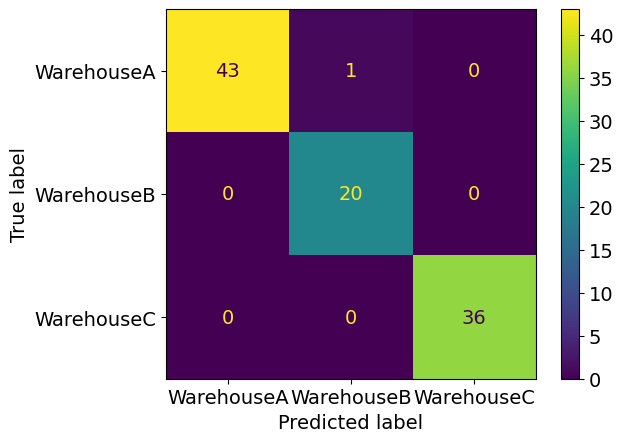

In [158]:
# Confusion matrix를 그립니다

plt.rcParams['font.size'] = 14 # 폰트 크기를 32로 해주세요

# Confusion matrix를 그립니다
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['WarehouseA', 'WarehouseB', 'WarehouseC']
)
disp.plot()
plt.show()

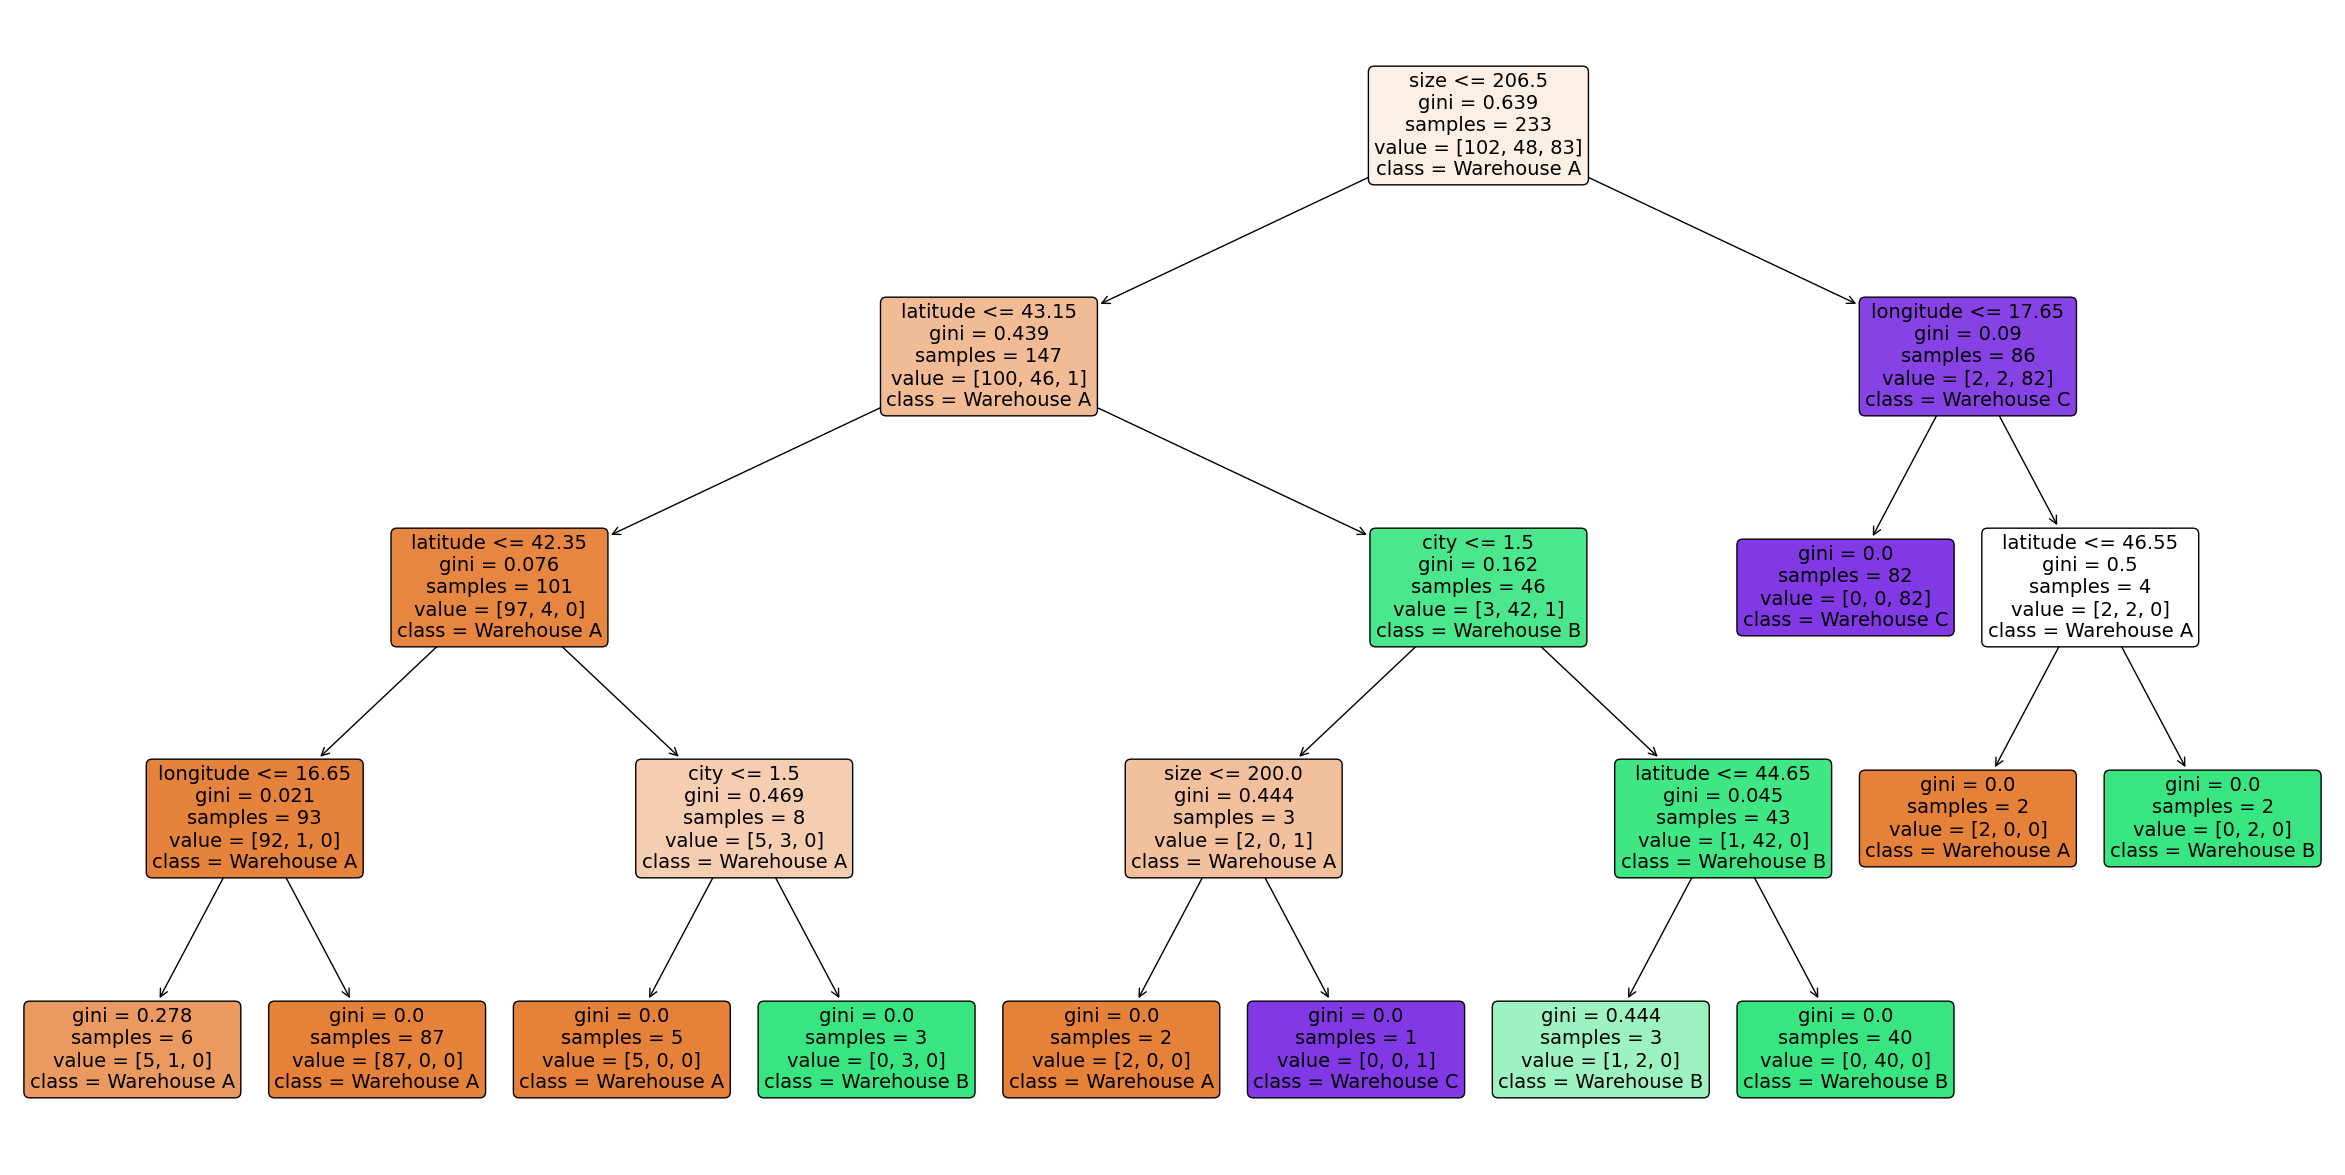

In [159]:
# 의사결정나무를 그립니다
plt.figure(figsize=(30, 15))
plot_tree(
    decision_tree=model,
    feature_names=test.columns[:6],
    class_names=['Warehouse A', 'Warehouse B', 'Warehouse C'],
    filled=True,
    proportion=False,
    rounded=True,
    fontsize=14
)
plt.show()

## K-평균 클러스터링(K-means Clustering)

* 비지도학습의 클러스터링(군집화)모델
* 레이블이 없는 데이터를 그룹화하는 알고리즘
* K개의 Centroid(데이터 중심)를 기반으로 K개의 클러스터를 만들어줌

### K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

#### 관련 DEMO 사이트
- https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

### 군집화 과정

1. 군집의 개수(K) 설정
2. 초기 중심점 설정
3. 데이터를 군집에 할당(배정)
4. 중심점 재설정(갱신)
5. 데이터를 군집에 재할당(배정)
6. 4,5단계를 반복해 중심점의 위치가 더 이상 변하지 않을때까지 반복


## 창고입지 선정 문제

- 100개의 고객(레스토랑)의 위치를 알고 있으며 이를 바탕으로 최적의 창고 K개의 위치를 선정해야하는데 k-means 클러스터링 알고리즘을 사용하고 지도를 이용해서 시각화 수행하기

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import folium

In [ ]:
# 레스토랑 위치 데이터 읽어오기
restaurant_df = pd.read_excel('./restaurant.xlsx')
restaurant_df

,ID,CITY,LAT,LON
0,LOC_0001,고양시,37.669953,126.855459
1,LOC_0002,고양시,37.697152,126.819685
2,LOC_0003,고양시,37.673797,126.775424
3,LOC_0004,고양시,37.682115,126.753546
4,LOC_0005,과천시,37.427751,126.992051
...,...,...,...,...
95,LOC_0096,용인시,37.330351,127.128377
96,LOC_0097,의왕시,37.349788,126.962600
97,LOC_0098,의왕시,37.351981,126.971166
98,LOC_0099,의정부시,37.749758,127.071792


In [ ]:
# 지도에 레스토랑 위치 시각화하기
map = folium.Map(location=[37.1382167251, 127.3114503751])

for i in range(len(restaurant_df)):
  folium.Marker([restaurant_df['LAT'][i], restaurant_df['LON'][i]], icon = folium.Icon()).add_to(map)
map

In [ ]:
# fit 시키기 위해 필요한 데이터의 형식대로 만들기
locList = [[0]*2 for i in range(len(restaurant_df))]

#for row in restaurant_df.iterrows():
#    print(row)

for idx, row in restaurant_df.iterrows():
        locList[idx][0] = float(row['LAT'])
        locList[idx][1] = float(row['LON'])

locList

[[37.669952806, 126.8554585712],
 [37.6971520856, 126.8196849679],
 [37.6737965993, 126.7754243376],
 [37.68211454, 126.7535463209],
 [37.427751416, 126.9920513446],
 [37.4410791763, 127.0104554264],
 [37.4992915278, 127.3027287142],
 [37.3456586222, 127.181749766],
 [37.3398340658, 127.3356487393],
 [37.4988495961, 127.3025714906],
 [37.4771884535, 127.1821089446],
 [37.3969132174, 127.2335940567],
 [37.4778648562, 127.3511585039],
 [37.6598939546, 126.665665695],
 [37.7312343266, 126.5260317627],
 [37.6219227553, 126.7226238685],
 [37.7496438017, 127.2086783633],
 [37.6463075748, 127.3058545873],
 [37.7450001929, 127.207958774],
 [37.6580785222, 127.2948606613],
 [37.7493163194, 127.2074650581],
 [37.9052438433, 127.0526923103],
 [37.9035354078, 127.0513831636],
 [37.9064954987, 127.0644013502],
 [37.89080184, 127.0566123836],
 [37.9029587869, 127.0538094986],
 [37.5035236772, 126.7620258315],
 [37.5063329471, 126.7515325472],
 [37.5147426141, 126.8138873897],
 [37.5269360205, 126.80

In [ ]:
# warehouse 개수
k = 3
# 4

#Clustering
clusteringModel = KMeans(n_clusters=k, init='k-means++')
clusteringModel.fit(locList)

map = folium.Map(location=[37.1382167251, 127.3114503751])

for i in range(len(restaurant_df)):
    color = ""
    if clusteringModel.labels_[i] == 0:
        color = "red"
    if clusteringModel.labels_[i] == 1:
        color = "blue"
    if clusteringModel.labels_[i] == 2:
        color = "orange"
#    if clusteringModel.labels_[i] == 3:
#        color = "green"


    folium.Marker([restaurant_df['LAT'][i], restaurant_df['LON'][i]],
                  icon = folium.Icon(color = color)).add_to(map)

map

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
warehouse = clusteringModel.cluster_centers_
warehouse = pd.DataFrame(warehouse)
warehouse

,0,1
0,37.783351,126.963419
1,37.338204,126.949735
2,37.369624,127.336113


In [ ]:
#Warehouse Locations
for element in clusteringModel.cluster_centers_:
        folium.Marker([element[0], element[1]],
                      icon=folium.Icon(color='gray',icon='star')).add_to(map)
map

In [ ]:
map.save('kmeansResult.html')

In [ ]:
warehouse.to_excel('warehouse.xlsx')

In [20]:
# 참고

# 항목 코드 목록
item_codes = [
    1100002, 1100005, 1100006, 1100008, 1100011, 1100014, 1100019, 1100031, 1100037, 1105967,
    1100024, 1100045, 1100047, 1000349, 1000925, 1001396, 1002085, 1002211, 1002417, 1002754,
    1002767, 1002795, 1004153, 1007093, 1007282, 1007603, 1014860, 1014861, 1015718, 1015721,
    1016423, 1021441, 1021442, 1023512, 2002056, 2002057, 2002060, 2006266, 2008101, 2009922,
    2010093, 2012096, 2012967, 2012968, 2014228, 2014296, 2014434, 2014681, 2014691, 2015475,
    2100010, 2100011, 1105753, 1021808, 1023113, 1023114, 1023120, 1023225, 1023643, 1023739,
    1024469, 1024470, 1024606, 1024696, 1024697, 1025312, 1025466, 1025467, 1025468, 1025469,
    1025611, 1105621, 1105623, 1105624, 1106388, 1106389, 1106393, 1021805, 1021806, 1021859,
    1021861, 1021862, 1021863, 1022846, 1022847, 1022850, 1022852, 1022853, 1022854, 1023582,
    1023583, 1025004, 1025005, 1025007, 1025009, 1025600, 1025603, 1105820, 1105821, 1105823,
    1105824, 1105825, 1105826, 1105827, 1105828, 1021742, 1021751, 1021793, 1021794, 1021796,
    1021798, 1021800, 1021801, 1023554, 1023555, 1023556, 1023557, 1023558, 1023673, 1023674,
    1023676, 1023677, 1023678, 1023679, 1023795, 1024339, 1024340, 1024341, 1024427, 1024428,
    1024636, 1024637, 1024638, 1024639, 1025347, 1025348, 1025349, 1025387, 1025388, 1025389,
    1025391, 1025514, 1025515, 1025516, 1025717, 1025718, 1105737, 1105738, 1105742, 1106290,
    1021841, 1021844, 1021857, 1021864, 1021966, 1021967, 1021968, 1021976, 1021977, 1021978,
    1025531, 1025532, 1021826, 1021827, 1021829, 1021836, 1021837, 1021975, 1021982, 1021984,
    1105593, 6037257, 6038125, 6038126, 6038127, 2040967, 2040993, 2041001, 2141173, 1105763,
    1105764, 1105765
]

# 임의의 위도와 경도 생성
np.random.seed(42)  # 재현성을 위해 시드 설정
latitudes = np.random.uniform(8.5, 23.5, len(item_codes))
longitudes = np.random.uniform(102, 109.5, len(item_codes))

# 데이터프레임 생성
coordinates_df = pd.DataFrame({
    'ITEM_CD': item_codes,
    'LATITUDE': latitudes,
    'LONGITUDE': longitudes
})

# 결과 확인
coordinates_df.head()

# 데이터프레임을 Excel 파일로 저장
output_file_path = 'coordinates.xlsx'
coordinates_df.to_excel(output_file_path, index=False)

coordinates_df.head()

,ITEM_CD,LATITUDE,LONGITUDE
0,1100002,14.118102,108.935202
1,1100005,22.760715,108.580045
2,1100006,19.479909,103.934562
3,1100008,17.479877,106.949880
4,1100011,10.840280,108.129167


## Model Selection

In [160]:
train_df = pd.read_csv('./model_selection_train.csv')
test_df = pd.read_csv('./model_selection_test.csv')

train_df.dropna(subset=['quantity'], inplace=True)

train_df['date'] = pd.to_datetime(train_df['date'], format="%d/%m/%y")
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
# train_df['day_of_week_name'] = train_df['date'].dt.day_name()
train_df['day_of_week'] = train_df['date'].dt.dayofweek
# train_df['is_weekend_name'] = train_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)

train_df = train_df.astype({'quantity': int, 'pop': int, 'id': int})
train_df.drop('id', axis=1, inplace=True)

train_df['city_num'] = train_df['city'].astype('category').cat.codes
train_df['shop_num'] = train_df['shop'].astype('category').cat.codes
train_df['brand_num'] = train_df['brand'].astype('category').cat.codes
train_df['container_num'] = train_df['container'].astype('category').cat.codes
train_df['capacity_num'] = train_df['capacity'].astype('category').cat.codes

test_df['date'] = pd.to_datetime(test_df['date'], format="%d/%m/%y")
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

test_df = test_df.astype({'quantity': int, 'pop': int, 'id': int})
test_df.drop('id', axis=1, inplace=True)

test_df['city_num'] = test_df['city'].astype('category').cat.codes
test_df['shop_num'] = test_df['shop'].astype('category').cat.codes
test_df['brand_num'] = test_df['brand'].astype('category').cat.codes
test_df['container_num'] = test_df['container'].astype('category').cat.codes
test_df['capacity_num'] = test_df['capacity'].astype('category').cat.codes

train_df.head(20)

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,year,month,day_of_week,is_weekend,city_num,shop_num,brand_num,container_num,capacity_num
0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,13280,2012,1,1,0,0,0,2,1,2
1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,6727,2012,1,1,0,0,0,2,2,0
2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,9848,2012,1,1,0,0,0,2,0,1
3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,20050,2012,1,1,0,0,0,0,1,2
4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,25696,2012,1,1,0,0,0,0,0,1
5,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,glass,500ml,1.00,15041,2012,1,1,0,0,0,4,1,2
6,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,can,330ml,0.43,34578,2012,1,1,0,0,0,4,0,1
7,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,gazoza,glass,500ml,0.49,44734,2012,1,1,0,0,0,1,1,2
8,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,glass,500ml,0.70,18623,2012,1,1,0,0,0,3,1,2
9,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,plastic,1.5lt,2.21,9645,2012,1,1,0,0,0,3,2,0


In [161]:
X_train = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
y_train = train_df['quantity']

X_test = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
y_test = test_df['quantity']

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, mape, r2


In [163]:
from sklearn.linear_model import LinearRegression

# 모델 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = lr.predict(X_test)
mae_lr, mse_lr, rmse_lr, mape_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, MAPE: {mape_lr}, R²: {r2_lr}')


Linear Regression - MAE: 9808.707247622042, MSE: 164846094.48410887, RMSE: 12839.2404169448, MAPE: 44.55621162267343, R²: 0.3699316545540645


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [164]:
from sklearn.tree import DecisionTreeRegressor

# 모델 훈련
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# 예측 및 평가
y_pred_dt = dt.predict(X_test)
mae_dt, mse_dt, rmse_dt, mape_dt, r2_dt = evaluate_model(y_test, y_pred_dt)

print(f'Decision Tree Regressor - MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, MAPE: {mape_dt}, R²: {r2_dt}')


Decision Tree Regressor - MAE: 4378.258333333333, MSE: 41464203.16203704, RMSE: 6439.270390505204, MAPE: 15.909063807269247, R²: 0.841517131702157


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [165]:
from sklearn.ensemble import RandomForestRegressor

# 모델 훈련
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf.predict(X_test)
mae_rf, mse_rf, rmse_rf, mape_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print(f'Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MAPE: {mape_rf}, R²: {r2_rf}')


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Random Forest Regressor - MAE: 3142.5933148148147, MSE: 22291861.19627278, RMSE: 4721.425758843697, MAPE: 11.016624023418542, R²: 0.9147969131764901


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [166]:
from sklearn.svm import SVR

# 모델 훈련
svr = SVR()
svr.fit(X_train, y_train)

# 예측 및 평가
y_pred_svr = svr.predict(X_test)
mae_svr, mse_svr, rmse_svr, mape_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

print(f'Support Vector Regressor - MAE: {mae_svr}, MSE: {mse_svr}, RMSE: {rmse_svr}, MAPE: {mape_svr}, R²: {r2_svr}')


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

Support Vector Regressor - MAE: 12210.568510248371, MSE: 276085207.50025547, RMSE: 16615.811972342955, MAPE: 51.941058582982535, R²: -0.05524216655647063


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [167]:
import xgboost as xgb

# 모델 훈련
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xg_reg.predict(X_test)
mae_xgb, mse_xgb, rmse_xgb, mape_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

print(f'XGBoost Regressor - MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, MAPE: {mape_xgb}, R²: {r2_xgb}')


XGBoost Regressor - MAE: 2565.439475278501, MSE: 13265521.502674734, RMSE: 3642.186362979623, MAPE: 9.457723822051852, R²: 0.949297038484139


c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [168]:
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_svr, mae_xgb],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svr, mse_xgb],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svr, rmse_xgb],
    'MAPE': [mape_lr, mape_dt, mape_rf, mape_svr, mape_xgb],
    'R²': [r2_lr, r2_dt, r2_rf, r2_svr, r2_xgb]
}

results_df = pd.DataFrame(results)
results_df


,Model,MAE,MSE,RMSE,MAPE,R²
0,Linear Regression,9808.707248,1.648461e+08,12839.240417,44.556212,0.369932
1,Decision Tree,4378.258333,4.146420e+07,6439.270391,15.909064,0.841517
2,Random Forest,3142.593315,2.229186e+07,4721.425759,11.016624,0.914797
3,Support Vector,12210.568510,2.760852e+08,16615.811972,51.941059,-0.055242
4,XGBoost,2565.439475,1.326552e+07,3642.186363,9.457724,0.949297


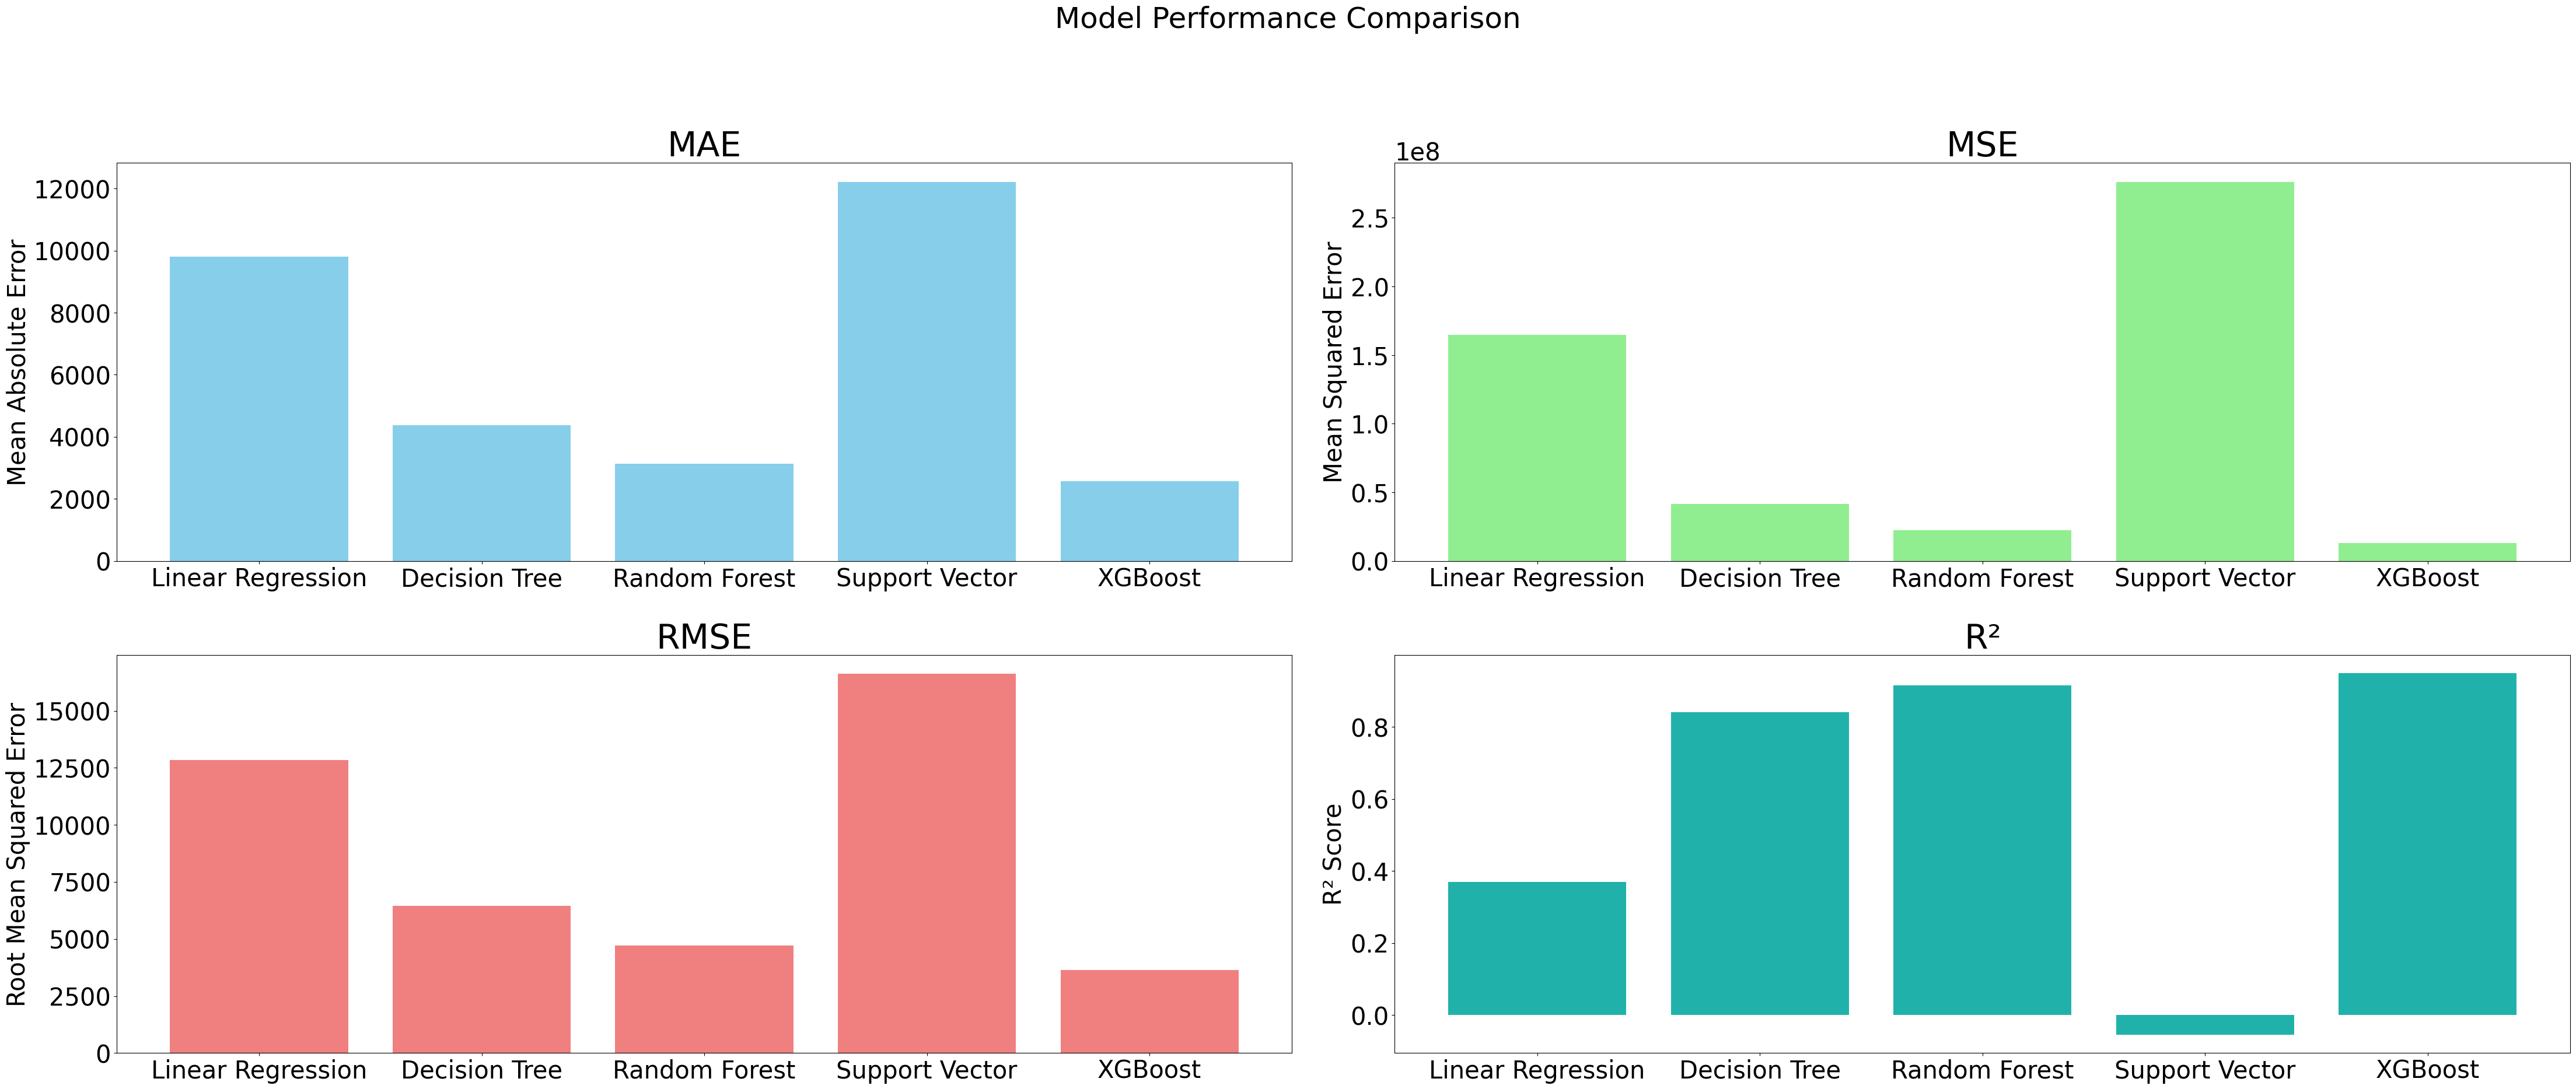

In [175]:
# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(45, 20))
fig.suptitle('Model Performance Comparison')

plt.rcParams.update({'font.size': 35})

# MAE
axes[0, 0].bar(results_df['Model'], results_df['MAE'], color='skyblue')
axes[0, 0].set_title('MAE')
axes[0, 0].set_ylabel('Mean Absolute Error')

# MSE
axes[0, 1].bar(results_df['Model'], results_df['MSE'], color='lightgreen')
axes[0, 1].set_title('MSE')
axes[0, 1].set_ylabel('Mean Squared Error')

# RMSE
axes[1, 0].bar(results_df['Model'], results_df['RMSE'], color='lightcoral')
axes[1, 0].set_title('RMSE')
axes[1, 0].set_ylabel('Root Mean Squared Error')

# R²
axes[1, 1].bar(results_df['Model'], results_df['R²'], color='lightseagreen')
axes[1, 1].set_title('R²')
axes[1, 1].set_ylabel('R² Score')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
